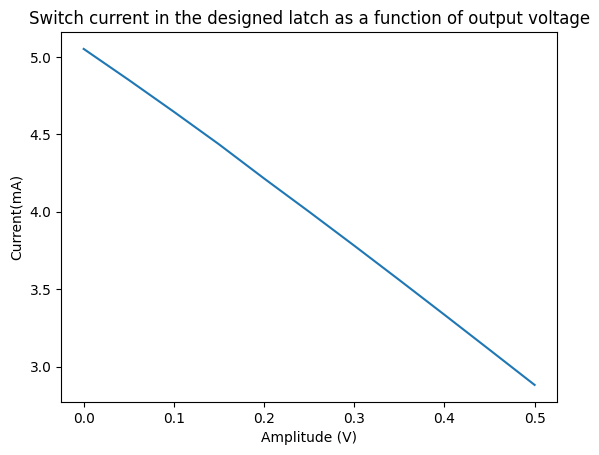

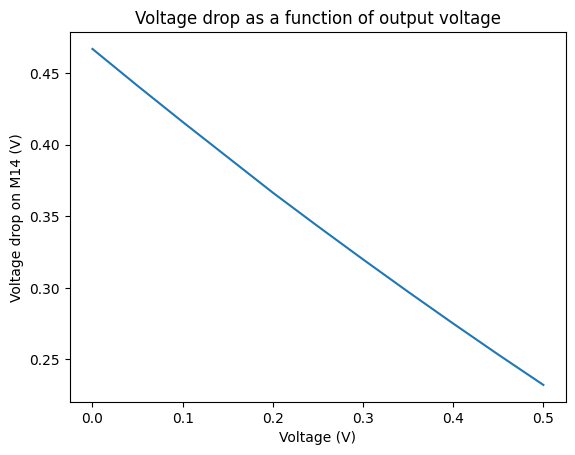

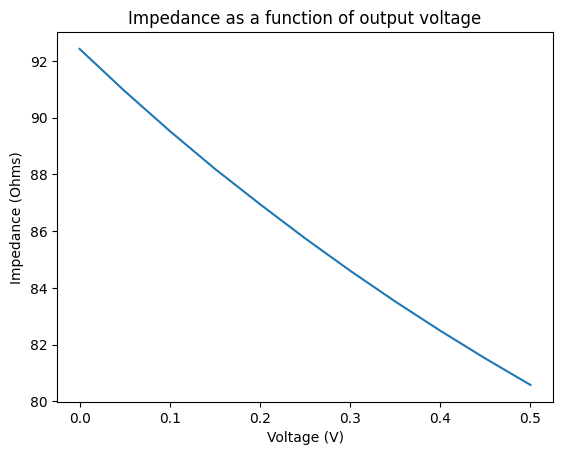

Ideal integration time (ps) - Approach 1: 22.26908948015544


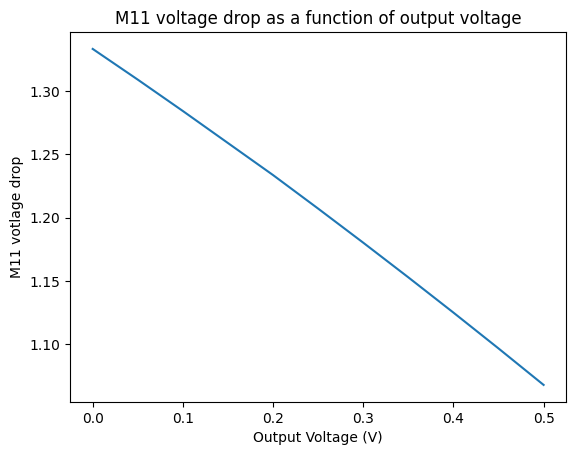

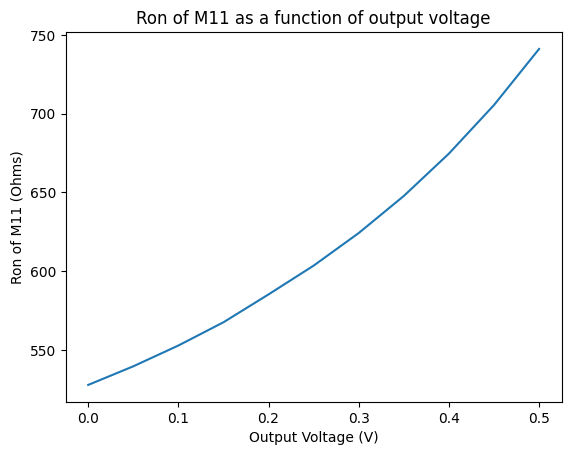

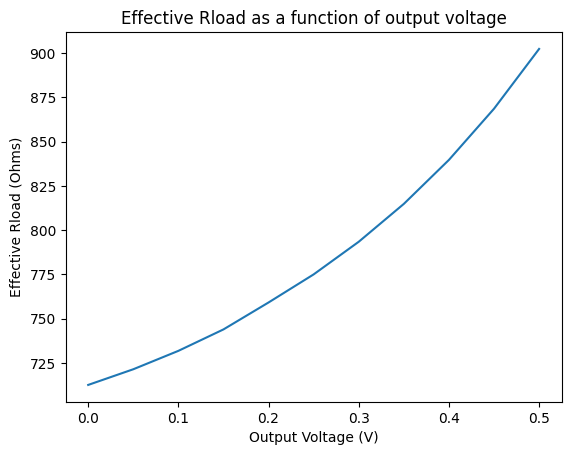

Tau (ps): 58.27811260541065
Predicted integration time (ps): 23.6297412278926
Predicted integration time (ps) - Approach 2: 51.6


In [2]:
import pandas as pd

## Estimating the integration time value in a conventional latch using C/ID analysis
import numpy as np
import matplotlib.pyplot as plt

vdd = 1.8
v_target = 0.6

# Load data from CSV file
data = pd.read_csv('I_M14_D.csv')
data2 = pd.read_csv('Vdrop_M11.csv')
# Plot the values
plt.plot(data['/M14/D X'], abs(data['/M14/D Y'])*1e3)
plt.xlabel('Amplitude (V)')
plt.ylabel('Current(mA)')
plt.title('Switch current in the designed latch as a function of output voltage')
plt.show()


### Ron of M11 
vdrop_M11 = data2['(VDC("/net7") - VDC("/net5")) Y']
Ron_M11 = vdrop_M11 / (0.5*abs(data['/M14/D Y']))

vdrop_M14 = vdd - (vdrop_M11+data['/M14/D X'])

Ron_M14 = (vdrop_M14)/abs(data['/M14/D Y'])

plt.plot(data['/M14/D X'], vdrop_M14)
plt.xlabel('Voltage (V)')
plt.ylabel('Voltage drop on M14 (V)')
plt.title('Voltage drop as a function of output voltage')
plt.show()


plt.plot(data['/M14/D X'], Ron_M14)
plt.xlabel('Voltage (V)')
plt.ylabel('Impedance (Ohms)')
plt.title('Impedance as a function of output voltage')
plt.show()

## Defining the total load cap

C_par = 69e-15
C_load = C_par + 5e-15

## Estimating the integration time - Pass 1 

T_int_ideal = C_load * v_target / (0.5*np.mean(abs(data['/M14/D Y']))) 
print('Ideal integration time (ps) - Approach 1:', T_int_ideal*1e12)

## Estimating the integration time - Pass 2 


plt.plot(data['/M14/D X'], vdrop_M11)
plt.xlabel('Output Voltage (V)')
plt.ylabel('M11 votlage drop')
plt.title('M11 voltage drop as a function of output voltage')
plt.show()

plt.plot(data['/M14/D X'], Ron_M11)
plt.xlabel('Output Voltage (V)')
plt.ylabel('Ron of M11 (Ohms)')
plt.title('Ron of M11 as a function of output voltage')
plt.show()

## Effective Rload estimation 

R_load = 2*Ron_M14 + Ron_M11

plt.plot(data['/M14/D X'], R_load)
plt.xlabel('Output Voltage (V)')
plt.ylabel('Effective Rload (Ohms)')
plt.title('Effective Rload as a function of output voltage')
plt.show()

## time estimation from log relationship between V and C.

Tau = np.mean(C_load * R_load)
print('Tau (ps):', Tau*1e12) 

t_int_pred = Tau * np.log(1/(1-v_target/vdd))
print('Predicted integration time (ps):', t_int_pred*1e12)


T_fixed_delay = 51.6e-12 - t_int_pred

T_int_pred_2 = t_int_pred + T_fixed_delay

print('Predicted integration time (ps) - Approach 2:', T_int_pred_2*1e12)




Tau (ps): [58.27811261 62.21582292 66.15353323 70.09124354 74.02895385 77.96666416
 81.90437447 85.84208478 89.77979509 93.71750541]


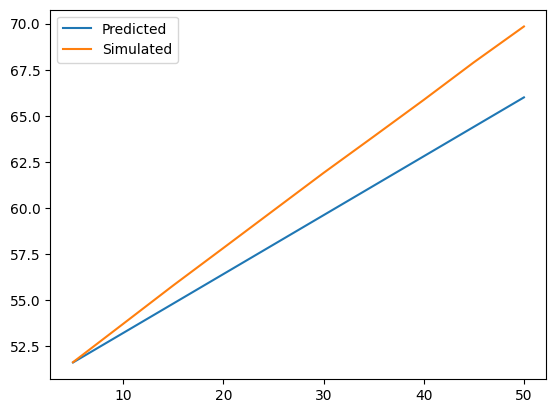

Slope of t_int_sim: 0.40416769976871747
Slope of t_int_pred: 0.3193208274039541
Error in Rout estimation: 20.992986924317915


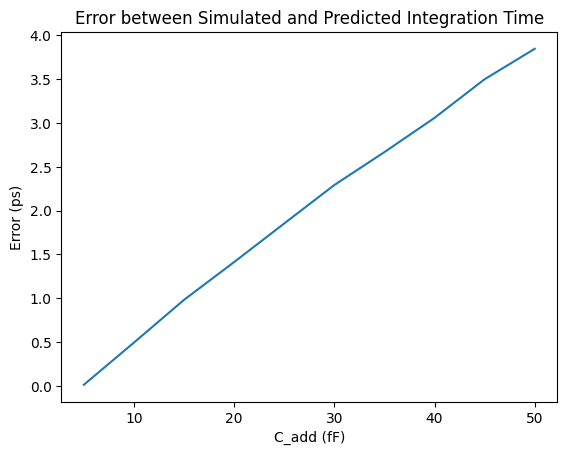

In [3]:
C_add = np.arange(5e-15, 55e-15, 5e-15)

C_load = C_par + C_add

T_fixed_delay = 28e-12 

vdrop_M11 = data2['(VDC("/net7") - VDC("/net5")) Y']
Ron_M11 = vdrop_M11 / (0.5*abs(data['/M14/D Y']))

vdrop_M14 = vdd - (vdrop_M11+data['/M14/D X'])

Ron_M14 = (vdrop_M14)/abs(data['/M14/D Y'])

R_load = np.mean(2*Ron_M14 + Ron_M11)

Tau = C_load * R_load

print('Tau (ps):', Tau*1e12) 

t_int_pred = Tau * np.log(1/(1-v_target/vdd))

T_int_pred_2 = t_int_pred + T_fixed_delay

plot = plt.plot(C_add*1e15, T_int_pred_2*1e12)

data3 = pd.read_csv('T_int_vs_C_add.csv')
t_int_sim = data3['t_integ Y']
plt.plot(C_add*1e15, t_int_sim*1e12)

plt.legend(['Predicted', 'Simulated'])
plt.show()
slope_1 = np.mean(np.gradient(t_int_sim*1e12, C_add*1e15))
print('Slope of t_int_sim:', slope_1)

slope_2 = np.mean(np.gradient(T_int_pred_2*1e12, C_add*1e15))
print('Slope of t_int_pred:', slope_2)

error_rout = (slope_1 - slope_2)/slope_1 * 100
print('Error in Rout estimation:', error_rout)

error = t_int_sim*1e12 - T_int_pred_2*1e12
plt.plot(C_add*1e15, error)
plt.xlabel('C_add (fF)')
plt.ylabel('Error (ps)')
plt.title('Error between Simulated and Predicted Integration Time')
plt.show()

In [4]:
## C/ID analysis prediction for the integration time

data4 = pd.read_csv('kgm_M14.csv')
data5 = pd.read_csv('kgm_M11.csv')
data6 = pd.read_csv('I_M11_D.csv')

kgm_M14 = np.mean(data4['kgm_14 Y'])
kgm_M11 = np.mean(data5['kgm_11 Y'])

print('kgm_M14:', kgm_M14)
print('kgm_M11:', kgm_M11)

Beta = kgm_M14/kgm_M11
print('Beta:', Beta)

K_eff = (2 + (1/Beta)) * np.log(vdd/(vdd - v_target))
print('K_eff:', K_eff)

C_fixed = 12.3e-15

Zeta_s = 28.1e-15/np.mean(abs(data6['/M11/S Y']))
print('Zeta_s:', Zeta_s)    

T_int_target = 50e-12

I_pred = (C_fixed*K_eff)/((T_int_target*Beta*kgm_M11)-(0.5*K_eff*Zeta_s))

I_total = 2*I_pred

print('Predicted total current (mA):', I_total*1e3)

kgm_M14: 0.6664263920653163
kgm_M11: 3.016554416871568
Beta: 0.22092304661835307
K_eff: 2.6462530325298728
Zeta_s: 1.408221049907776e-11
Predicted total current (mA): 4.431808051895079


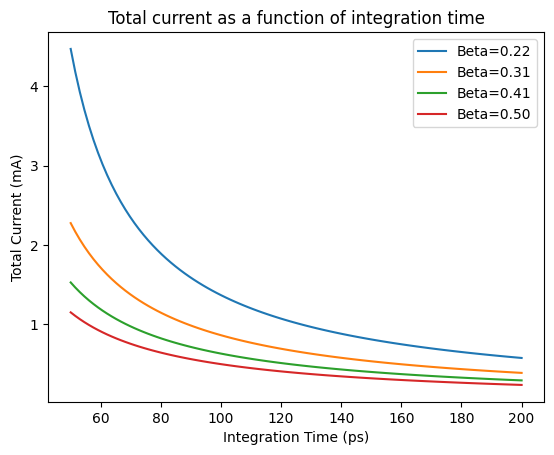

In [15]:
T_int_targets = np.linspace(50e-12, 200e-12, 100)
I_totals = []

Beta_values = np.linspace(0.22, 0.5, 4)
I_totals_dict = {}

for Beta in Beta_values:
    I_totals = []
    for T_int_target in T_int_targets:
        I_pred = (C_fixed * K_eff) / ((T_int_target * Beta * kgm_M11) - (0.5 * K_eff * Zeta_s))
        I_total = 2 * I_pred
        I_totals.append(I_total)
    I_totals_dict[Beta] = I_totals

    
for Beta, I_totals in I_totals_dict.items():
    plt.plot(T_int_targets * 1e12, np.array(I_totals) * 1e3, label=f'Beta={Beta:.2f}')

plt.xlabel('Integration Time (ps)')
plt.ylabel('Total Current (mA)')
plt.title('Total current as a function of integration time')
plt.legend()
plt.show()

In [24]:
## regenerative time constant estimation
v_start = 0.5
C_L = 5e-15

Factor = np.log(0.75*vdd/v_start)
print('Factor:', Factor)

data7 = pd.read_csv('I_eff_cross_coupled.csv')
I_eff = np.mean(data7['I_eff Y'])

print('I_eff(mA):', I_eff*1e3)

data8 = pd.read_csv('kgm_eff_cross_coupled.csv')
kgm_eff = np.mean(data8['kgm_eff Y'])

print('kgm_eff:', kgm_eff)

data9 = pd.read_csv('kc_eff_cross_coupled.csv')
kc_eff = np.mean(data9['kc_eff Y'])

print('kc_eff:', kc_eff)

Tau_reg = ((kc_eff*I_eff)+C_L)/(kgm_eff*I_eff)
print('Tau_reg (ps):', Tau_reg*1e12)


Factor: 0.9932517730102834
I_eff(mA): 3.0418173654081992
kgm_eff: 4.801262272975364
kc_eff: 4.474735360354468e-11
Tau_reg (ps): 9.662273198788597
